# example for [encoloc.R](https://github.com/cumc/pecotmr/blob/main/R/encoloc.R)

## Input
- GWAS susie_rss rds: `/mnt/vast/hpc/homes/dmc2245/project/UKBB_GWAS_dev/code/python/output/SuSiE_RSS/study1.8_25007602-26225312.susie_rss.rds`
- eQTL susie rds:chr8	25080000	28480000	ENSG00000092964 a susie rds file added region info
`/mnt/vast/hpc/csg/rf2872/Work/test/susie_test/MWE_2024/Mic_example.ENSG00000092964.susie_weights_db.mod.rds`

In [1]:
gwas_path <- "/mnt/vast/hpc/csg/rf2872/Work/test/susie_test/MWE_2024/study1.8_26225312-27515963.susie_rss.mod.rds"
# gwas_path <- "/mnt/vast/hpc/homes/dmc2245/project/UKBB_GWAS_dev/code/python/output/SuSiE_RSS/study1.8_25007602-26225312.susie_rss.rds"

gwas <- readRDS(gwas_path)

In [2]:
gwas$sets

$cs
NULL

$coverage
NULL

$requested_coverage
[1] 0.95

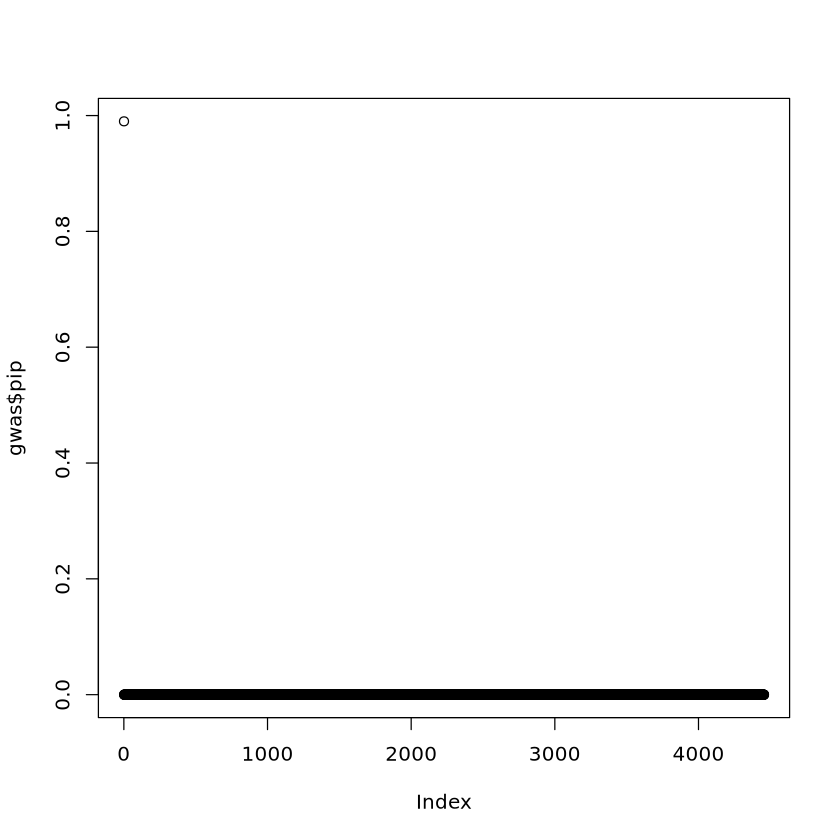

In [3]:
plot(gwas$pip)

In [4]:
head(gwas$pip)

8:25007602_T_C 8:25007803_G_A 8:25007987_T_C 8:25008023_A_G 8:25008096_C_A 
          0.99           0.00           0.00           0.00           0.00 
8:25008100_C_T 
          0.00

In [369]:
# # gwas$pip[[1]] = 0.99
# # names(gwas$pip) <- gsub(":(\\d+):(\\w):(\\w)", ":\\1_\\2_\\3", names(gwas$pip))
# colnames(gwas$alpha) <-  gsub(":(\\d+):(\\w):(\\w)", ":\\1_\\2_\\3", colnames(gwas$alpha) )
# colnames(gwas$lbf_variable) <-  gsub(":(\\d+):(\\w):(\\w)", ":\\1_\\2_\\3", colnames(gwas$lbf_variable) )
# saveRDS(gwas, "/mnt/vast/hpc/csg/rf2872/Work/test/susie_test/MWE_2024/study1.8_26225312-27515963.susie_rss.mod.rds")

In [4]:
qtl_path <- "/mnt/vast/hpc/csg/rf2872/Work/test/susie_test/MWE_2024/Mic_example.ENSG00000092964.susie_weights_db.mod.mod.rds"

In [7]:
qtl <- readRDS(qtl_path)

In [8]:
names(qtl[[1]])

[1] "Mic"

In [9]:
names(qtl[[1]][['Mic']])

[1] "sumstats"             "analysis_script"      "other_quantities"    
 [4] "sample_names"         "variant_names"        "susie_result_trimmed"
 [7] "top_loci"             "twas_weights"         "twas_cv_result"      
[10] "total_time_elapsed"   "region_info"

In [10]:
head(qtl[[1]][['Mic']]$variant_names)

[1] "chr8:25080187_T_G" "chr8:25081082_A_G" "chr8:25081366_C_T"
[4] "chr8:25081367_G_A" "chr8:25081404_G_A" "chr8:25081597_C_G"

In [11]:
names(qtl[[1]] [['Mic']][['susie_result_trimmed']])

[1] "pip"                    "sets"                   "cs_corr"               
 [4] "sets_secondary"         "alpha"                  "lbf_variable"          
 [7] "mu"                     "mu2"                    "V"                     
[10] "X_column_scale_factors"

In [12]:
qtl[[1]][['Mic']][['susie_result_trimmed']][['sets']]

$cs
NULL

$coverage
NULL

$requested_coverage
[1] 0.95

In [9]:
# # #fake the region (haven't got the new susie output for this gene)
#  qtl[[1]][['Mic']]$region_info$region <- data.frame(chrome = 8, start = 25080000, end = 28480000)

# saveRDS(qtl, "/mnt/vast/hpc/csg/rf2872/Work/test/susie_test/MWE_2024/Mic_example.ENSG00000092964.susie_weights_db.mod.rds")

In [100]:

# qtl[[1]][['Mic']][[5]] <- gsub(":(\\d+):(\\w):(\\w)", ":\\1_\\2_\\3", qtl[[1]][['Mic']][[5]])
# saveRDS(qtl, "/mnt/vast/hpc/csg/rf2872/Work/test/susie_test/MWE_2024/Mic_example.ENSG00000092964.susie_weights_db.mod.mod.rds")

## 1. load pkgs

In [58]:
library(susieR)
library(coloc)
library(pecotmr)
library(tidyverse)
library(data.table)
pkgs <- list.files("/mnt/vast/hpc/homes/rf2872/codes/pecotmr/R", full.names = TRUE)
for(i in pkgs){
    source(i)
}

## 2. enrichment 

In [6]:
enrich_res <- xqtl_enrichment_wrapper(gwas_files = gwas_path, xqtl_files = qtl_path,
                                      xqtl_finemapping_obj = c("Mic", "susie_result_trimmed"), xqtl_varname_obj = c("Mic", "variant_names"))

Warning message in compute_qtl_enrichment(gwas_pip = dat$gwas_pip, susie_qtl_regions = dat$xqtl_data, :
“pi_gwas is not provided. Estimating pi_gwas from the data. Note that this estimate may be biased if the input gwas_pip does not contain genome-wide variants.”


Estimated pi_gwas:  0.00022 


Warning message in compute_qtl_enrichment(gwas_pip = dat$gwas_pip, susie_qtl_regions = dat$xqtl_data, :
“pi_qtl is not provided. Estimating pi_qtl from the data. Note that this estimate may be biased if either 1) the input susie_qtl_regions does not have enough data, or 2) the single effects only include variables inside of credible sets or signal clusters.”


Estimated pi_qtl:  6e-04 
Fine-mapped GWAS and QTL data loaded successfully for enrichment analysis!
Proportion of xQTL missing from GWAS variants: 0.625 in MI round 0
Proportion of xQTL missing from GWAS variants: 0.875 in MI round 1
Proportion of xQTL missing from GWAS variants: 1 in MI round 2
Proportion of xQTL missing from GWAS variants: 0.625 in MI round 3
Proportion of xQTL missing from GWAS variants: 0.75 in MI round 4
Proportion of xQTL missing from GWAS variants: 0.75 in MI round 5
Proportion of xQTL missing from GWAS variants: 0.75 in MI round 6
Proportion of xQTL missing from GWAS variants: 0.625 in MI round 7
Proportion of xQTL missing from GWAS variants: 0.75 in MI round 8
Proportion of xQTL missing from GWAS variants: 1 in MI round 9
Proportion of xQTL missing from GWAS variants: 0.75 in MI round 10
Proportion of xQTL missing from GWAS variants: 0.75 in MI round 11
Proportion of xQTL missing from GWAS variants: 0.875 in MI round 12
Proportion of xQTL missing from GWAS va

## 3. coloc with prior

In [65]:
coloc_res <- coloc_wrapper(
  xqtl_file = qtl_path, gwas_files = gwas_path, 
    xqtl_finemapping_obj = c("Mic", "susie_result_trimmed"), xqtl_varname_obj = c("Mic", "variant_names"), 
    xqtl_region_obj = c("Mic", "region_info", "region"),
    p1 = enrich_res[[1]]$`Alternative (coloc) p1`, p2 = enrich_res[[1]]$`Alternative (coloc) p2`,
    p12 = enrich_res[[1]]$`Alternative (coloc) p12`, prior_tol = 1e-09
)

In [66]:
length(coloc_res)

[1] 2

### Fake a variant pair with PP.H4 value > 0.85 to test post processing

In [63]:
coloc_res$summary[1,8] = 0.85

In [17]:
LD_meta_file_path = "/mnt/vast/hpc/csg/data_public/20240120_ADSP_LD_matrix/ld_meta_file.tsv"

In [18]:
post_processed_res <- coloc_post_processor(coloc_res, LD_meta_file_path, analysis_region= coloc_res$analysis_region)

In [19]:
post_processed_res

nsnps,hit1,hit2,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,idx1,idx2
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.095660e-07,1.465277e-07,0.4278354,0.5720568,0.8500000000,1,1
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.097872e-07,1.463064e-07,0.4286993,0.5711946,0.0001058648,2,1
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.100157e-07,1.460779e-07,0.4295917,0.5703037,0.0001043044,3,1
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.101220e-07,1.459717e-07,0.4300065,0.5698896,0.0001036220,4,1
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.100972e-07,1.459965e-07,0.4299096,0.5699864,0.0001037738,5,1
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.099944e-07,1.460992e-07,0.4295085,0.5703868,0.0001044384,6,1
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.098603e-07,1.462334e-07,0.4289846,0.5709098,0.0001053579,7,1
3916,chr8:26260096:C:T,chr8:27362470:C:T,1.097201e-07,1.463736e-07,0.4284371,0.5714563,0.0001063869,8,1
3916,chr8:26260096:C:T,chr8:27493464:T:C,1.689283e-03,2.259156e-03,0.4261462,0.5697593,0.0001459972,1,2
